In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import pandas as pd
df = pd.DataFrame(boston.data) # load numerical data
df.columns = boston.feature_names # set column names
df['MEDV'] = boston.target # define target as median house price

In [6]:
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [7]:
df.shape

(506, 14)

In [8]:
print("num sample = ", df.shape[0])
print("num attribute = ", df.shape[1])

num sample =  506
num attribute =  14


In [9]:
import numpy as np
y = np.array(df['MEDV'])

In [10]:
a = np.extract(y>40,y)
print("The mean house price is %2.2d thousands of dollars."%np.mean(y))
per_over_40 = a.shape[0]/y.shape[0]*100
print("Only %d percent are above $40k."% per_over_40)

The mean house price is 22 thousands of dollars.
Only 6 percent are above $40k.


In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
x = np.array(df['RM'])

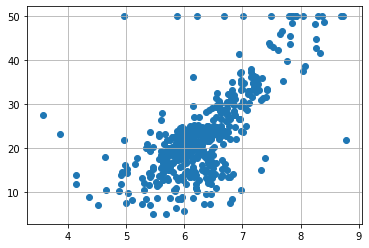

In [13]:
plt.scatter(x, y)
plt.grid()

In [72]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x, 
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    xm = np.mean(x)
    ym = np.mean(y)
    sxx = np.mean((x-xm)**2)
    syy = np.mean((y-ym)**2)
    syx = np.mean((y-ym)*(x-xm))
    sx = sxx**(1/2)
    sy = syy**(1/2)
    beta1 = syx/sxx
    beta0 = ym - beta1*xm
    rsq = (syx/sx/sy)**2
    return beta0, beta1, rsq

In [73]:
k = fit_linear(x,y)

In [74]:
print(k)

(-34.67062077643857, 9.10210898118031, 0.483525455991334)


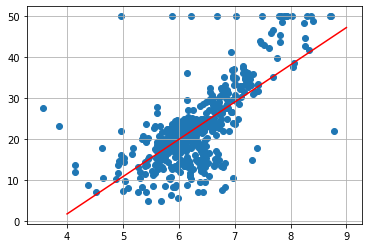

In [59]:
xp = np.linspace(4,9,100)
yp = k[0]+k[1]*xp
plt.scatter(x, y)
plt.grid()
plt.plot(xp,yp,color = 'red')

In [120]:
for b in range(0,13):
    q = fit_linear(np.array(df[boston.feature_names[b]]), y)
    #line_new = '%s  %.3f' % (boston.feature_names[b], q[2])
    line_new = '{:<10}  {:>.3f}'.format(boston.feature_names[b], q[2])
    print(line_new)

CRIM        0.151
ZN          0.130
INDUS       0.234
CHAS        0.031
NOX         0.183
RM          0.484
AGE         0.142
DIS         0.062
RAD         0.146
TAX         0.220
PTRATIO     0.258
B           0.111
LSTAT       0.544


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')